In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [10]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [11]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [12]:
# Save references to each table
Measurement= Base.classes.measurement
Stations= Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session= Session(engine)

# Exploratory Precipitation Analysis

In [13]:
from sqlalchemy import inspect
inspector= inspect(engine)

In [14]:
inspector.get_table_names()

['measurement', 'station']

In [15]:
columns= inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [16]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
query_date= dt.date(2017, 8, 23) - dt.timedelta(days=365)
query_date

# Save the query results as a Pandas DataFrame and set the index to the date column
sel= [Measurement.date,Measurement.prcp]
query_r= session.query(*sel).filter(Measurement.date >= query_date).all()
Precipitation = pd.DataFrame(query_r, columns= ['Date','Precipitation'])
Precipitation= Precipitation.dropna(how='any')

# Sort the dataframe by date
Precipitation= Precipitation.sort_values(['Date'], ascending=True)
Precipitation= Precipitation.set_index('Date')
Precipitation.head()



,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


<function matplotlib.pyplot.show(close=None, block=None)>

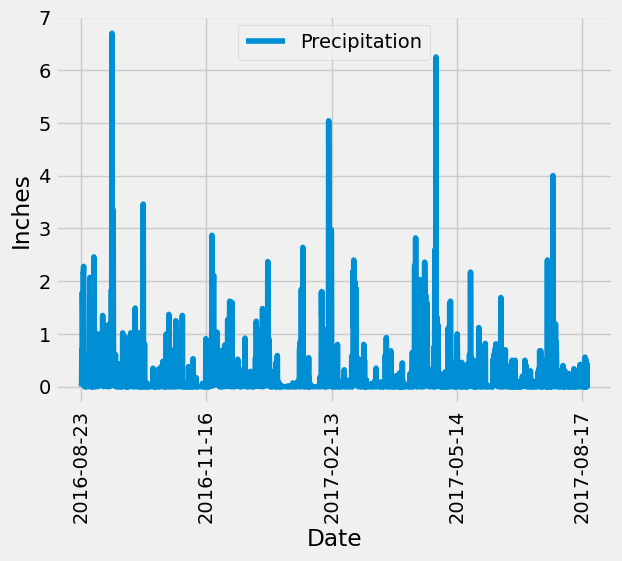

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
Precipitation.plot(rot=90)
plt.ylabel('Inches')
plt.xlabel('Date')
plt.locator_params(axis='x', nbins=6)
plt.show


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precipitation.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number stations in the dataset
session.query(Stations.id).count()

9

In [23]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_Station= 'USC00519281'
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
              func.avg(Measurement.tobs)).filter(Measurement.station == most_active_Station).all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

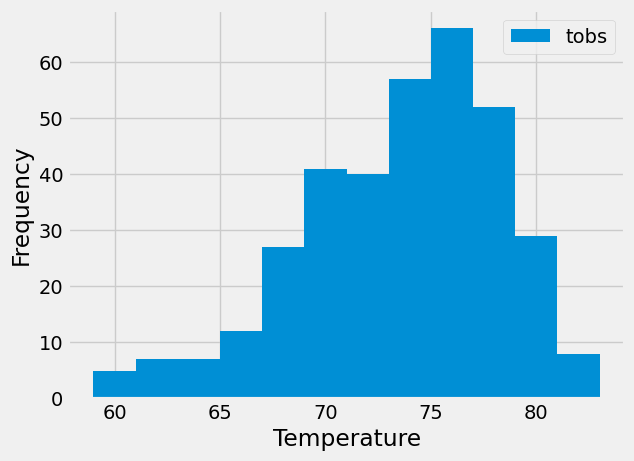

In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_obs= active_stations[0][0]
temp_dist= session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.date >= "2016-08-24").\
            filter(Measurement.date <= "2017-08-23").\
            filter(Measurement.station == temperature_obs).all()
temp_dist_df=pd.DataFrame(temp_dist)
temp_dist_df.plot.hist(bins=12)
plt.xlabel('Temperature')

# Close session

In [ ]:
# Close Session
session.close()